In [1]:
import networkx as nx
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

In [3]:
# read data
data_path = '/Users/luojiayu/Downloads/semester1/Network Science/Assignments/Assignment3/data-assignment3/'

name_list = [
    'graph_jazz_collab',
    'graph_polblog',
    'graph_terrorists'
]
all_graph = dict()

for name in name_list:
    graph_real = nx.read_gml(data_path+name+".gml")
    
#     # read random graph 
#     graph_random = nx.read_gml(data_path+name+"_random.gml")
    
    # generate random graph
    graph_random = nx.algorithms.smallworld.random_reference(graph_real)
    
    all_graph[name] = [graph_real, graph_random]
    
    

# A03.1 Centrality correlations

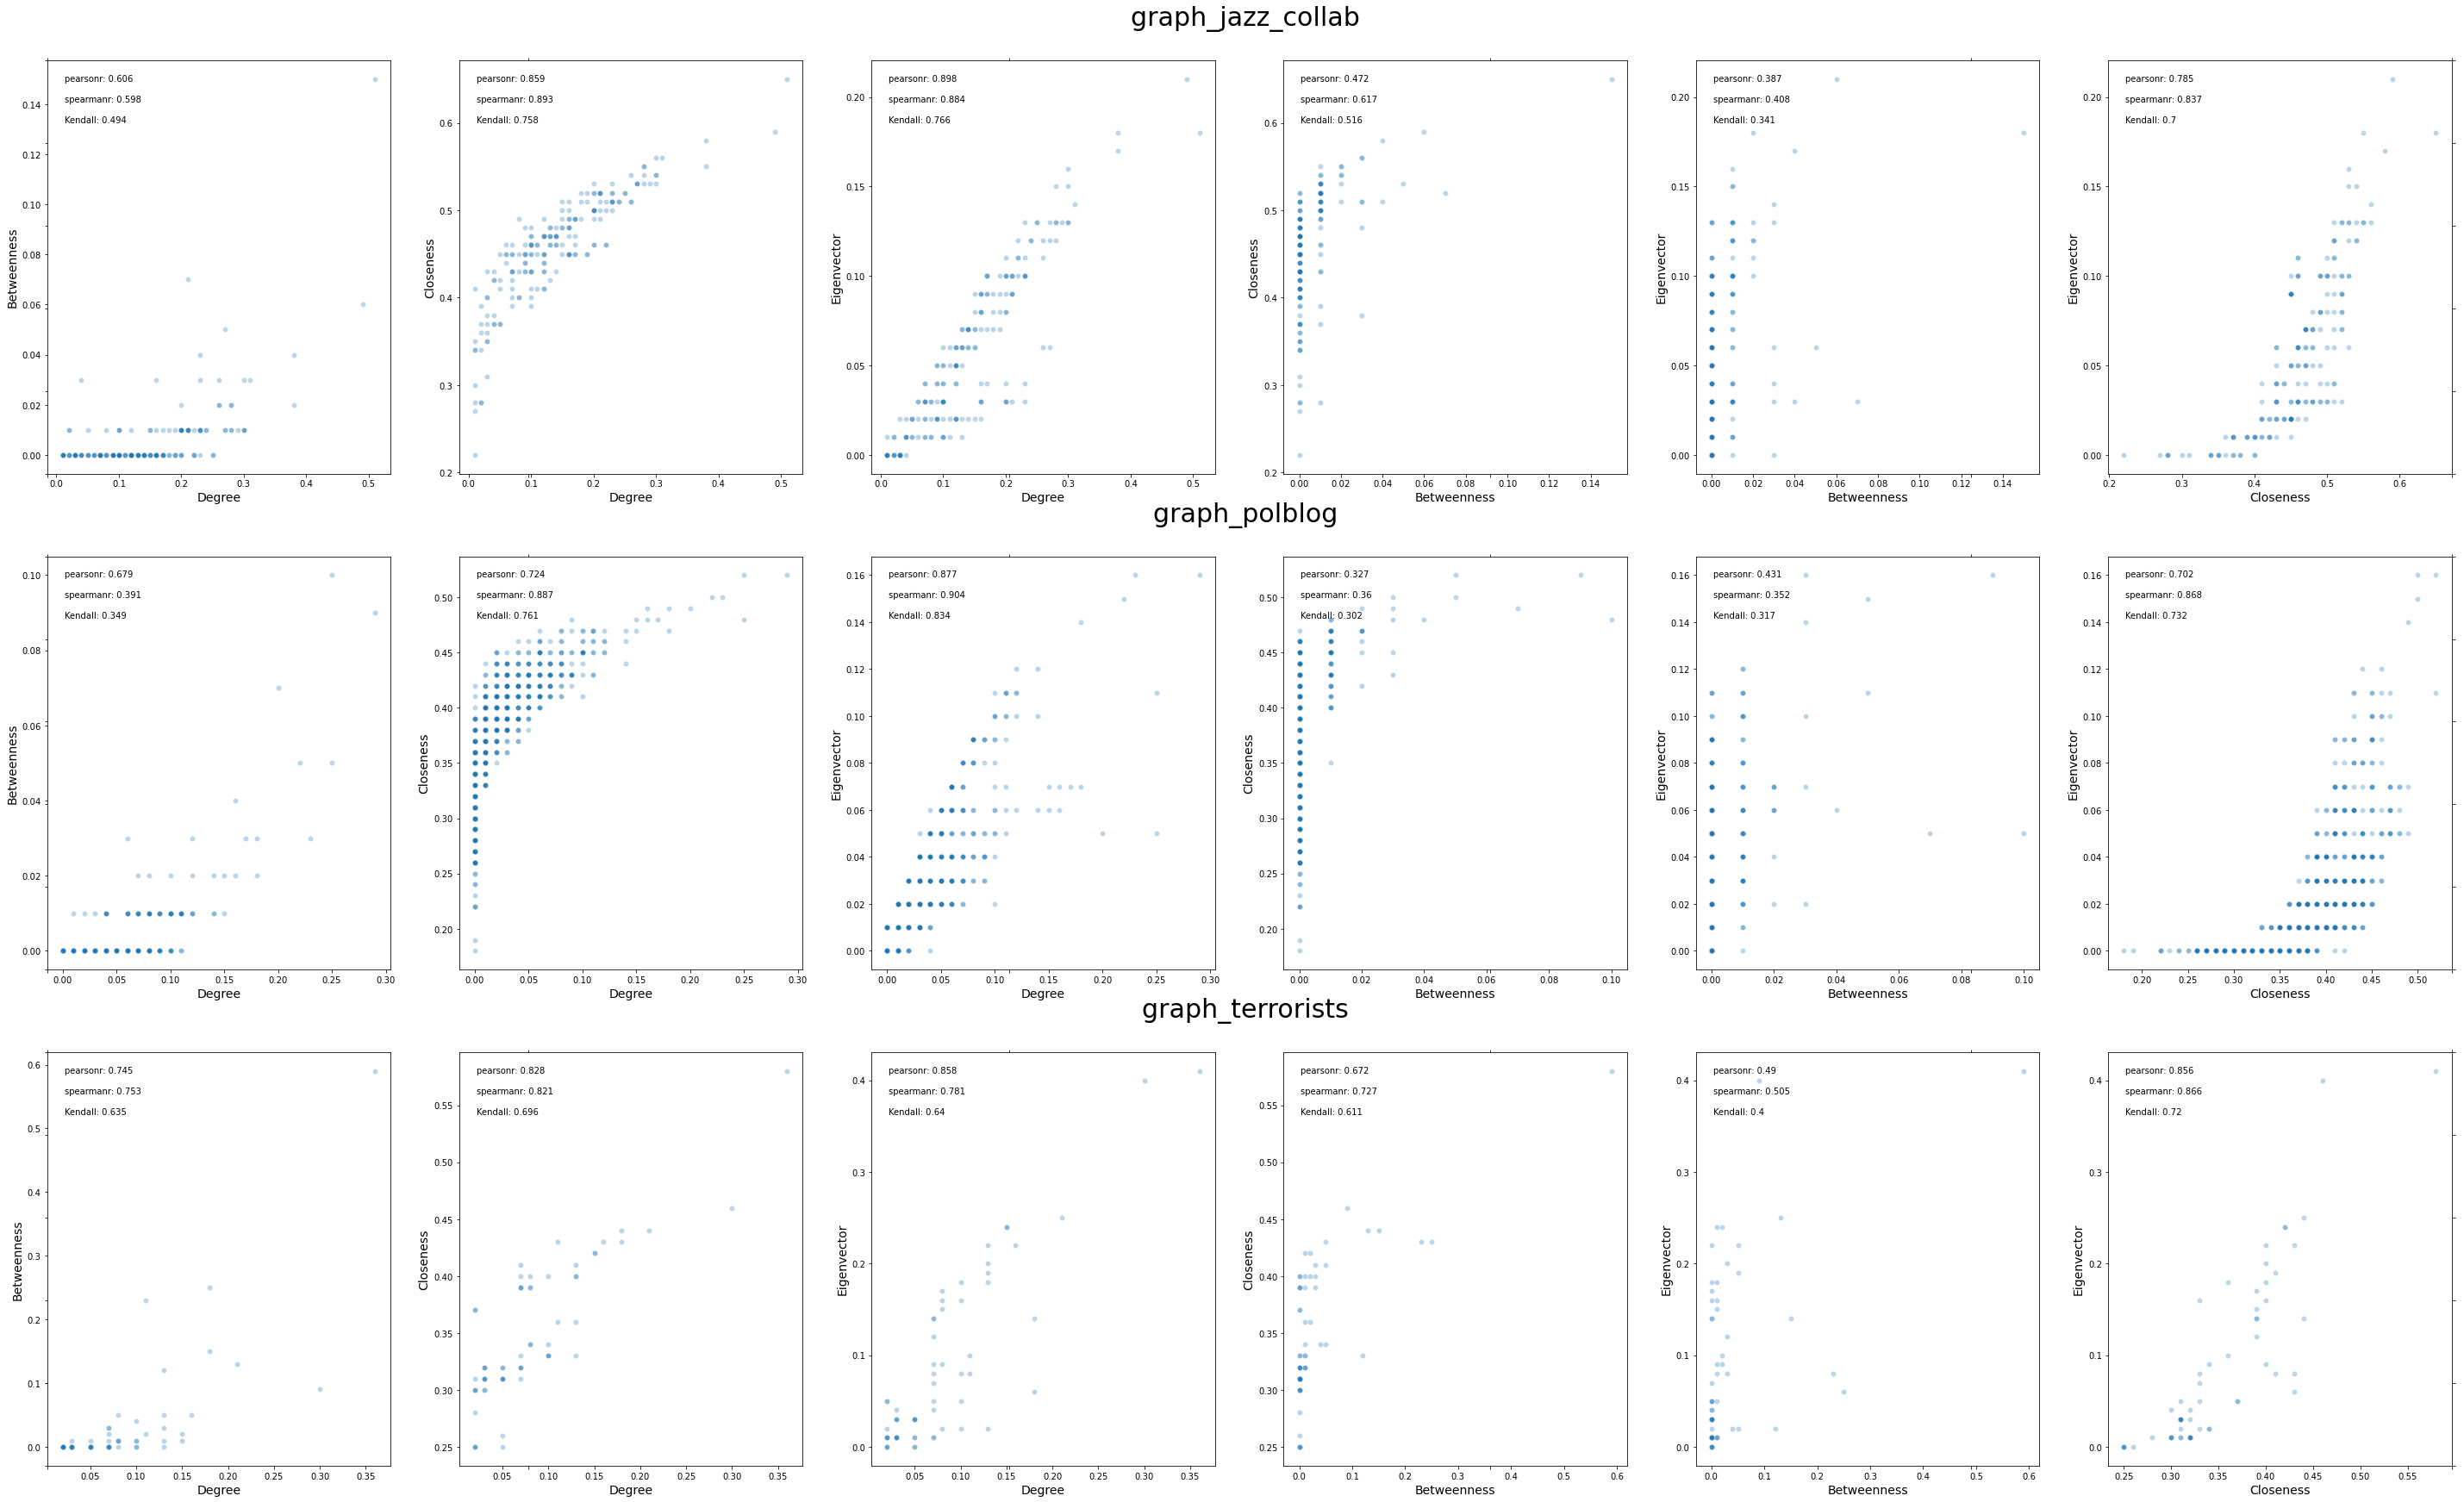

In [4]:
fig, big_axes = plt.subplots(nrows = len(all_graph), ncols = 1, figsize=(50, 30)) 

row_title = list(all_graph.keys())
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title("%s \n" % row_title[row-1], fontsize=30)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

ax_index = 1
for grapg_name in all_graph:
    g = all_graph[grapg_name][0] # real graph
    
    # calculate Centrality
    degree_cen = nx.degree_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    close_cen = nx.closeness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    
    # generate dict
    Centrality_dict = {
        'Degree': [round(item, 2) for item in degree_cen.values()], # 
        'Betweenness':[round(item, 2) for item in between_cen.values()], # 
        'Closeness':[round(item, 2) for item in close_cen.values()], # 
        'Eigenvector':[round(item, 2) for item in eigen_cen.values()], # 
    }
    Centrality_df = pd.DataFrame(Centrality_dict) 
    
    # define pair 0 1 2 3
    pair_list = [['Degree','Betweenness'],['Degree','Closeness'],
                 ['Degree','Eigenvector'],['Betweenness','Closeness'], 
                 ['Betweenness','Eigenvector'], ['Closeness','Eigenvector']] # 
    c_index= 0
    for i in pair_list:
        ax = fig.add_subplot(len(all_graph),6,ax_index)
        sns.scatterplot(
            data = Centrality_df, x= i[0], y = i[1],
            edgecolors='k', alpha=0.3,
            ax=ax
        )
        
        # corresponding correlation coefficient 
        pearsonr = round(stats.pearsonr(Centrality_df[i[0]], Centrality_df[i[1]])[0],3)
        spearmanr = round(stats.spearmanr(Centrality_df[i[0]], Centrality_df[i[1]])[0],3)
        Kendall = round(stats.kendalltau(Centrality_df[i[0]], Centrality_df[i[1]])[0],3)
        
        ax.text(0.05, 0.95,'pearsonr: '+str(pearsonr),  transform = ax.transAxes)
        ax.text(0.05, 0.90,'spearmanr: '+str(spearmanr), transform = ax.transAxes)
        ax.text(0.05, 0.85,'Kendall: '+str(Kendall),  transform = ax.transAxes)
             
        ax_index += 1
    
    

**Question**: briefly explain, for the Jazz collaborations data, what each of the centrality measures means in practice.   
**Answer**
Following graph is the visualization of Jazz collaborations data.  
(1) Degree Centrality:  evaluate how much a nodes is connected to others.     
(2) Betweenness Centrality:identify high-throughput nodes. since many nodes don't play a role in bridging others in Jazz collaborations dataset, they don't have high betweenness centrality.  
(3) Closeness Centrality: measure the distance from a node to others. In this graph, some remote nodes(not in the central position) have high closeness centrality.  
(4) Eigenvector Centrality: measure whether a node connects to other important nodes  

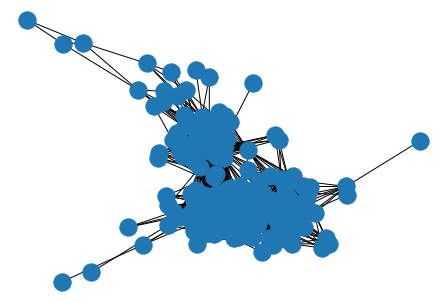

In [5]:
nx.draw(all_graph['graph_jazz_collab'][0])

# A03.2 Centrality and randomisation

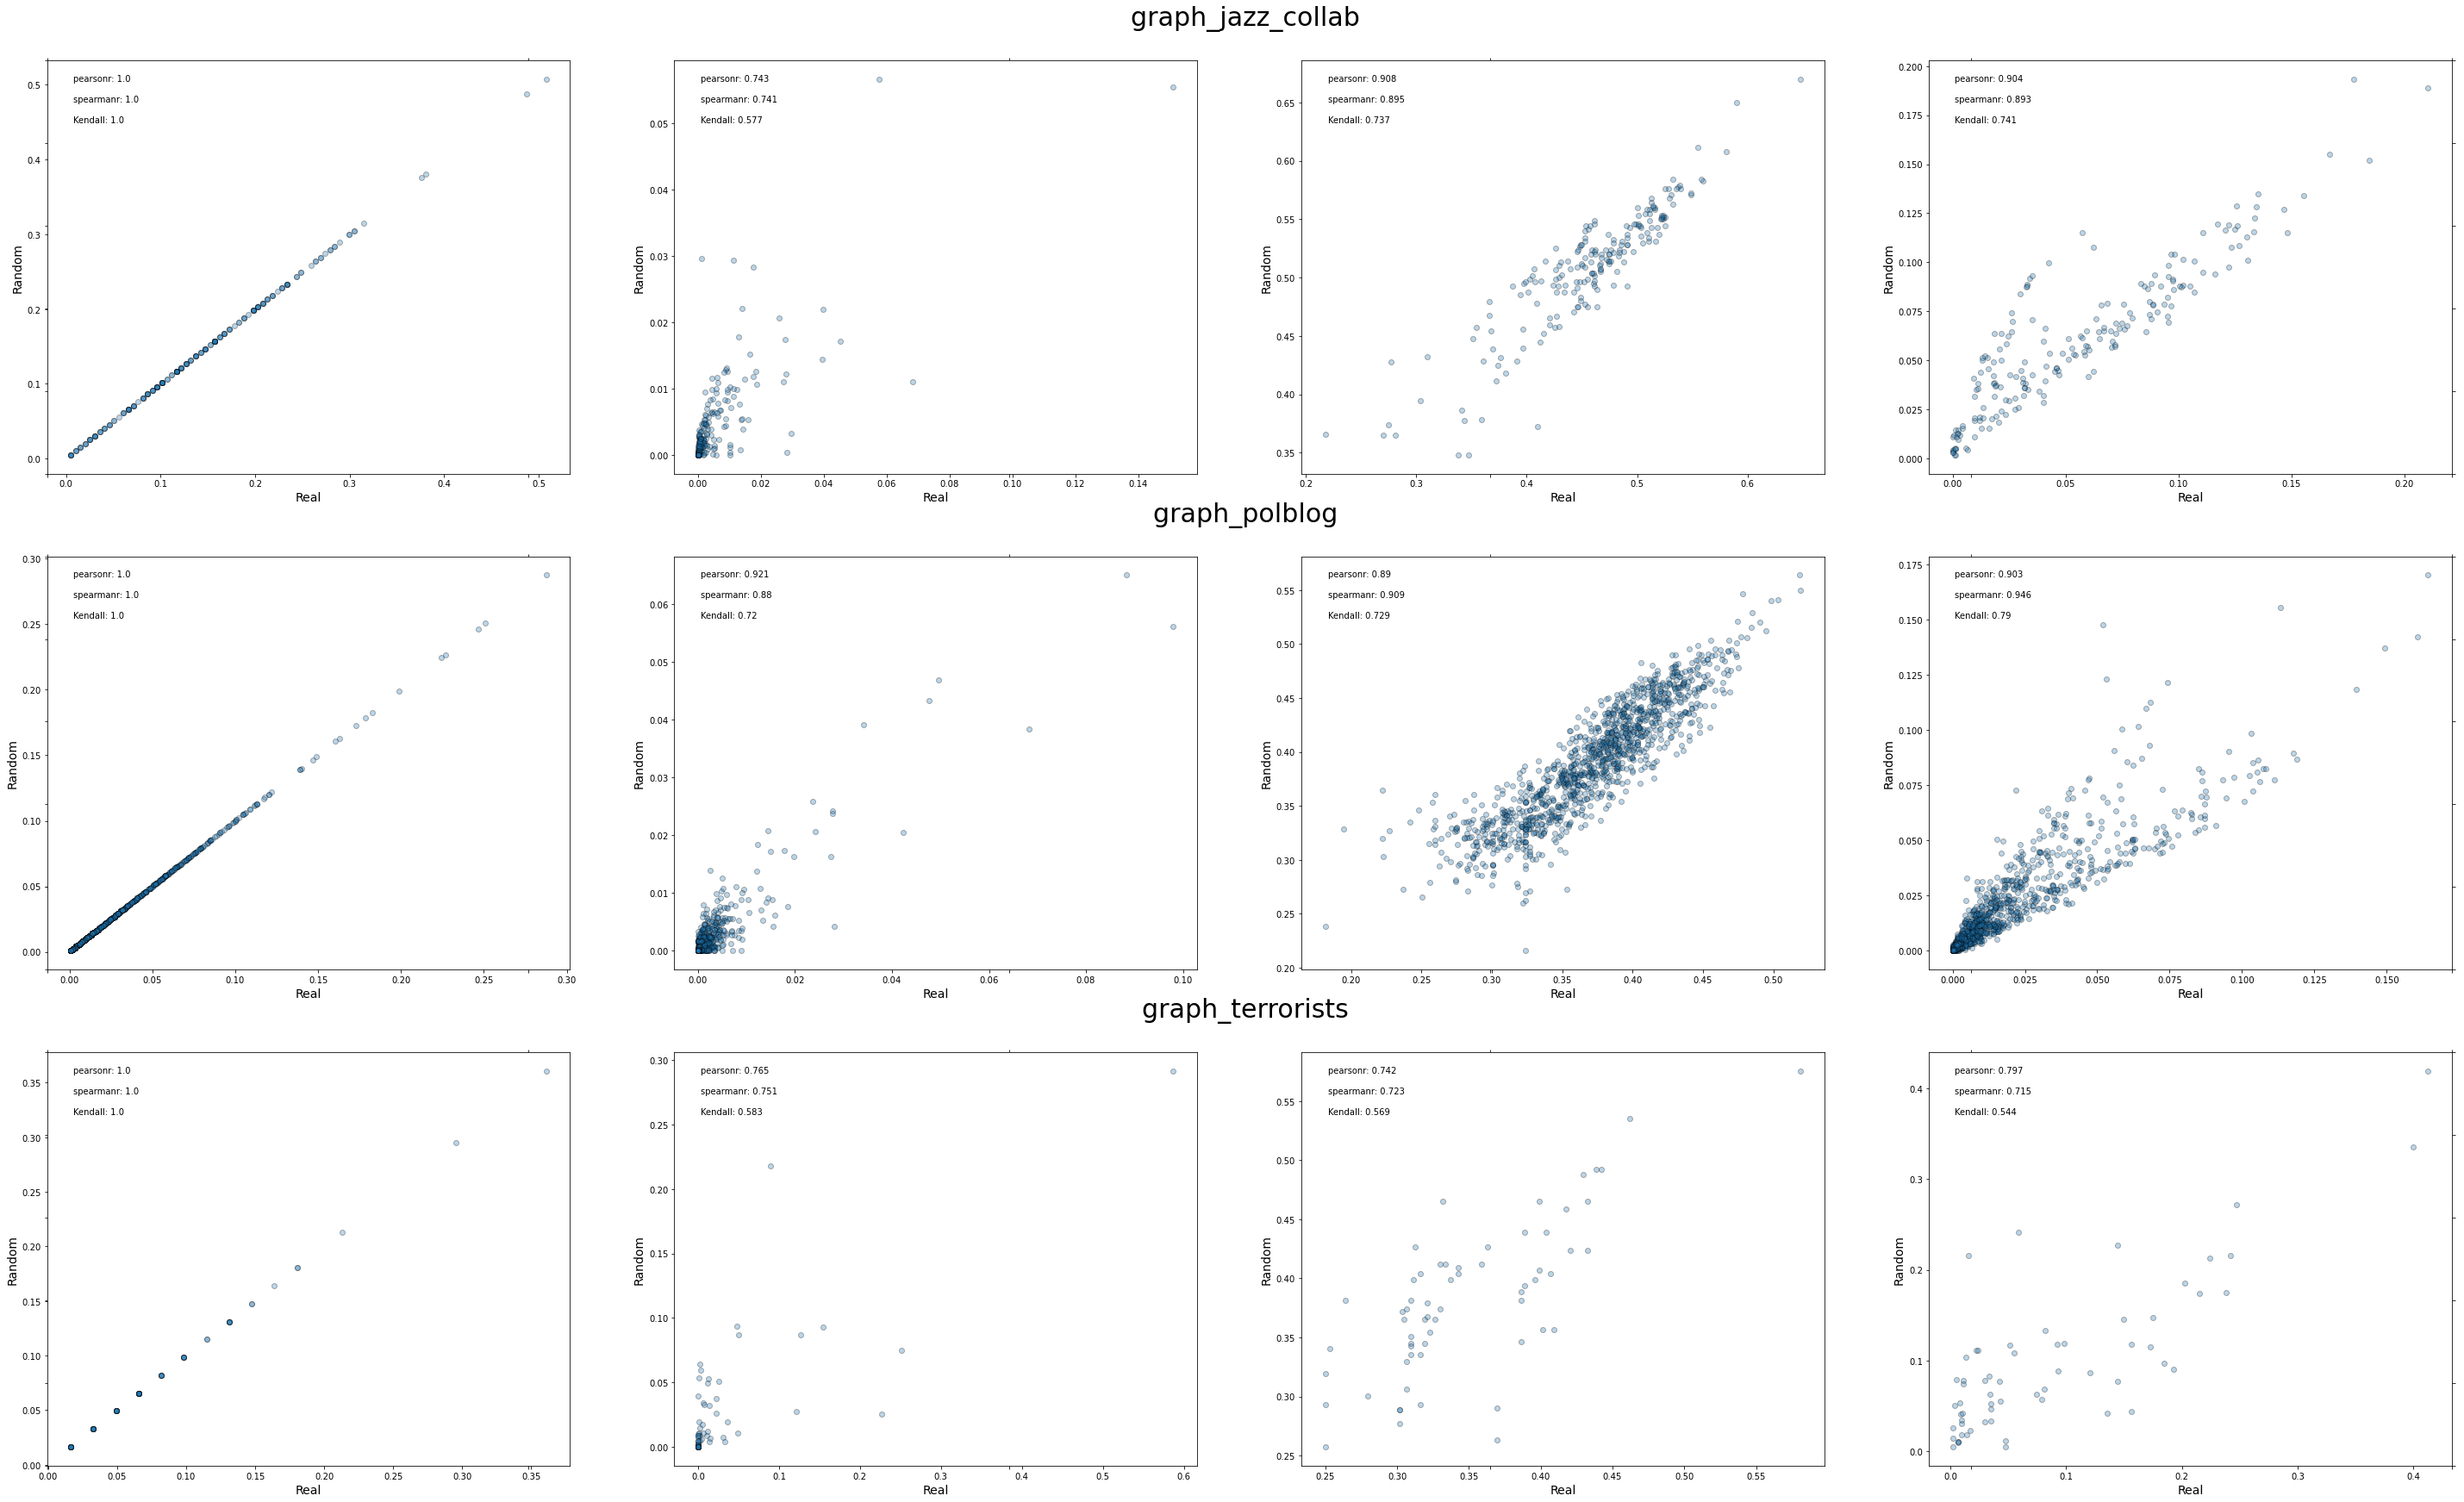

In [6]:
fig, big_axes = plt.subplots(nrows = len(all_graph), ncols = 1, figsize=(50, 30)) 

row_title = list(all_graph.keys())
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title("%s \n" % row_title[row-1], fontsize=30)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    

ax_index = 1
for grapg_name in all_graph:
    
    g_real = all_graph[grapg_name][0] # real graph
    g_random = all_graph[grapg_name][1] # real random
    
    # calculate Centrality
    degree_cen_real = np.array(list(nx.degree_centrality(g_real).values()))
    between_cen_real = np.array(list(nx.betweenness_centrality(g_real).values()))
    close_cen_real = np.array(list(nx.closeness_centrality(g_real).values()))
    eigen_cen_real = np.array(list(nx.eigenvector_centrality(g_real).values()))
    
    degree_cen_random = np.array(list(nx.degree_centrality(g_random).values()))
    between_cen_random = np.array(list(nx.betweenness_centrality(g_random).values()))
    close_cen_random = np.array(list(nx.closeness_centrality(g_random).values()))
    eigen_cen_random = np.array(list(nx.eigenvector_centrality(g_random).values()))
    
    centrality_ressult = {
        'Degree':[degree_cen_real,degree_cen_random],
        'Betweenness':[between_cen_real, between_cen_random],
        'Closeness':[close_cen_real, close_cen_random],
        'Eigenvecto':[eigen_cen_real, eigen_cen_random],
    }
    
    c_index = 0
    for c_name in centrality_ressult:
        
        ax = fig.add_subplot(len(all_graph),len(centrality_ressult),ax_index)
        
        result = centrality_ressult[c_name]
        
        ax.scatter(x=result[0], y=result[1], edgecolors='k', alpha=0.3,)
        ax.set(xlabel='Real', ylabel='Random') 
        
        # corresponding correlation coefficient
        pearsonr = round(stats.pearsonr(result[0], result[1])[0],3)
        spearmanr = round(stats.spearmanr(result[0], result[1])[0],3)
        Kendall = round(stats.kendalltau(result[0], result[1])[0],3)
        
        ax.text(0.05, 0.95,'pearsonr: '+str(pearsonr),  transform = ax.transAxes)
        ax.text(0.05, 0.90,'spearmanr: '+str(spearmanr), transform = ax.transAxes)
        ax.text(0.05, 0.85,'Kendall: '+str(Kendall),  transform = ax.transAxes)
          
        ax_index+=1
    

**Question**: Why do you get that result for degree centrality?   
**Answer**: 
- Randomizing will not alter the distribution of degree. So Degree Centrality will not chage.

# A03.3 PageRank

In [7]:
g_foodweb = nx.read_graphml(data_path+"Florida_foodweb.graphml",node_type=int)
# nx.draw(g_foodweb)

[Text(0.5, 0, 'Alpha'), Text(0, 0.5, 'Spearman Rank Coefficient')]

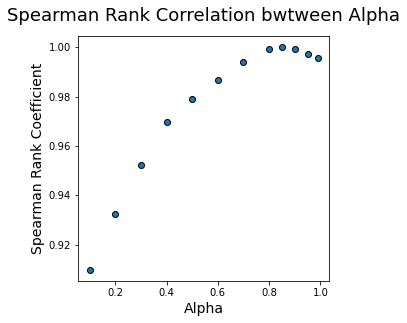

In [9]:
fig, axs = plt.subplots(figsize=(4.5, 4.5)) 

alpha_baseline = nx.pagerank(g_foodweb, alpha=0.85)
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.85, 0.9, 0.95, 0.99]
y = list()
for i in x:
    alpha_i = nx.pagerank(g_foodweb, alpha=i)
    y_i = stats.spearmanr(list(alpha_baseline.values()), list(alpha_i.values()))[0]
    y.append(y_i)

plt.scatter(x=x, y=y, edgecolors='k',)
axs.set_title('Spearman Rank Correlation bwtween Alpha', pad = 15)
axs.set(xlabel='Alpha', ylabel='Spearman Rank Coefficient')